# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Suvrangshu Ghosh
#----------------------
#Modification History:
# Please Use Your API Key in api_keys.py
#----------------------

# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time


#Calculate current date:

#print("Current date "  + time.strftime("%x"))
cur_date = time.strftime("%x")

#-----------------------------------
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#filewrite = open(output_data_file,"w") 

#filewrite.write("Test write" + '\n') #write to txt file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

615
['nioro', 'saskylakh', 'bardiyah', 'tuktoyaktuk', 'kapaa', 'mataura', 'saleaula', 'cape town', 'victoria', 'komsomolskiy', 'bethel', 'saint-philippe', 'saint-louis', 'ushuaia', 'lagoa', 'busselton', 'tadine', 'mackay', 'yellowknife', 'castro', 'kaeo', 'barentsburg', 'port-gentil', 'airai', 'qaanaaq', 'illoqqortoormiut', 'butaritari', 'tateyama', 'sao miguel do oeste', 'nikolskoye', 'puerto ayora', 'sao gabriel da cachoeira', 'crab hill', 'berlevag', 'chagda', 'albany', 'hobart', 'amderma', 'husavik', 'tiksi', 'provideniya', 'nanortalik', 'hamilton', 'coromandel', 'aksarka', 'port alfred', 'esperance', 'goure', 'torbay', 'port elizabeth', 'constitucion', 'chilon', 'korla', 'abay', 'vaini', 'jamestown', 'bengkulu', 'coahuayana', 'xichang', 'sambava', 'hithadhoo', 'bluff', 'san rafael', 'khatanga', 'brae', 'araci', 'coos bay', 'hofn', 'berikulskiy', 'mansalay', 'longonjo', 'sentyabrskiy', 'tambul', 'shiyan', 'bredasdorp', 'qostanay', 'kirakira', 'phuket', 'rikitea', 'ponta do sol', 'a

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:

#create data frame for weather
weather_df = pd.DataFrame(columns=
                          ['City',
                           'Cloudiness',
                           'Country',
                           'Date',
                           'Humidity',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Wind Speed']
                           )
#declare counter to count records and sets (50 record = 1 set)

count = 0
xset = 1
for xcity in cities:
    try:
        if count == 0:
            print("*** Begin of data retrival for set # ", xset, " ***") #print- begin statement at first
            print("_"  * 31,'\n')
            
        count+=1
        api = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_keys.api_key}&q={xcity}"
        
        print(f"Processing Record {count} of Set {xset} | {xcity}")
        print(api)
        if count == 50:
            count = 0
            xset+=1
        response = requests.get(api).json()
        
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        weather = {
            "City":xcity,
            "Cloudiness":cloudiness,
            "Country":country,
            "Date":date,
            "Humidity":humidity,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Wind Speed":wind_speed}
        
        weather_df = weather_df.append(weather, ignore_index=True)
        
    except:
        print("City not found. Skipping...")
        
print("_"  * 31,'\n')
        
print("*** Data Retrieval Complete ***")

print("_"  * 31,'\n')

    

*** Begin of data retrival for set #  1  ***
_______________________________ 

Processing Record 1 of Set 1 | nioro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nioro
Processing Record 2 of Set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=saskylakh
Processing Record 3 of Set 1 | bardiyah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bardiyah
City not found. Skipping...
Processing Record 4 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tuktoyaktuk
Processing Record 5 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kapaa
Processing Record 6 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c2

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=chilon
Processing Record 3 of Set 2 | korla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=korla
City not found. Skipping...
Processing Record 4 of Set 2 | abay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=abay
Processing Record 5 of Set 2 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vaini
Processing Record 6 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=jamestown
Processing Record 7 of Set 2 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bengkulu
City not found. Skipping...
Processing Record 8 of Set 2 | coahuayana
http://api.openweathermap.org/data/2.5/weather?uni

Processing Record 5 of Set 3 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=clyde river
Processing Record 6 of Set 3 | trincomalee
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=trincomalee
Processing Record 7 of Set 3 | atka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=atka
City not found. Skipping...
Processing Record 8 of Set 3 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lorengau
Processing Record 9 of Set 3 | spirit river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=spirit river
Processing Record 10 of Set 3 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=beringovskiy
Processing Record 11 of Set 3 | thompso

Processing Record 8 of Set 4 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nyurba
Processing Record 9 of Set 4 | viligili
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=viligili
City not found. Skipping...
Processing Record 10 of Set 4 | mahebourg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mahebourg
Processing Record 11 of Set 4 | san antero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san antero
Processing Record 12 of Set 4 | puerto escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=puerto escondido
Processing Record 13 of Set 4 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=necochea
Processing Record 14 of Set 4 | lichin

Processing Record 11 of Set 5 | narsaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=narsaq
Processing Record 12 of Set 5 | northam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=northam
Processing Record 13 of Set 5 | aksu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=aksu
Processing Record 14 of Set 5 | tual
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tual
Processing Record 15 of Set 5 | zhuhai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=zhuhai
Processing Record 16 of Set 5 | wapi pathum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=wapi pathum
Processing Record 17 of Set 5 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imper

Processing Record 14 of Set 6 | touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=touros
Processing Record 15 of Set 6 | bridgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bridgetown
Processing Record 16 of Set 6 | toora-khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=toora-khem
Processing Record 17 of Set 6 | grinnell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=grinnell
Processing Record 18 of Set 6 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bathsheba
Processing Record 19 of Set 6 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=attawapiskat
City not found. Skipping...
Processing Record 20 of Set 6 | bauchi
h

Processing Record 17 of Set 7 | abapo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=abapo
Processing Record 18 of Set 7 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bambous virieux
Processing Record 19 of Set 7 | mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mao
Processing Record 20 of Set 7 | biarritz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=biarritz
Processing Record 21 of Set 7 | mitrofanovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mitrofanovka
Processing Record 22 of Set 7 | ndele
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ndele
City not found. Skipping...
Processing Record 23 of Set 7 | tantoyuca
http://api.o

Processing Record 19 of Set 8 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rocha
Processing Record 20 of Set 8 | proletarsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=proletarsk
Processing Record 21 of Set 8 | fort morgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=fort morgan
Processing Record 22 of Set 8 | martapura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=martapura
Processing Record 23 of Set 8 | myaundzha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=myaundzha
Processing Record 24 of Set 8 | dibaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=dibaya
City not found. Skipping...
Processing Record 25 of Set 8 | polis
http://api.o

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sobolevo
Processing Record 23 of Set 9 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=deputatskiy
Processing Record 24 of Set 9 | jhalida
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=jhalida
Processing Record 25 of Set 9 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=camacha
Processing Record 26 of Set 9 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ngukurr
City not found. Skipping...
Processing Record 27 of Set 9 | okha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=okha
Processing Record 28 of Set 9 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 25 of Set 10 | goderich
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=goderich
Processing Record 26 of Set 10 | aginskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=aginskoye
Processing Record 27 of Set 10 | mildura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mildura
Processing Record 28 of Set 10 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=poum
Processing Record 29 of Set 10 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=batagay-alyta
Processing Record 30 of Set 10 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=flinders
Processing Record 31 of Set 10 | abu dhabi
http://api.openweathermap.org/d

Processing Record 28 of Set 11 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=saint anthony
Processing Record 29 of Set 11 | rexburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=rexburg
Processing Record 30 of Set 11 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kiama
Processing Record 31 of Set 11 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 11 | puerto baquerizo moreno
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=puerto baquerizo moreno
Processing Record 33 of Set 11 | itigi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=itigi
Processing R

City not found. Skipping...
Processing Record 29 of Set 12 | aojiang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=aojiang
Processing Record 30 of Set 12 | sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sabang
Processing Record 31 of Set 12 | lyubinskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lyubinskiy
Processing Record 32 of Set 12 | baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=baykit
Processing Record 33 of Set 12 | villa carlos paz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=villa carlos paz
Processing Record 34 of Set 12 | careiro da varzea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=careiro da varzea
Processing Record 35

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#check dataframe 
weather_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [9]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nioro,48,GM,1546840295,43,13.79,-15.05,65.98,8.43
1,saskylakh,12,RU,1546839782,0,71.97,114.09,-38.92,4.18
2,tuktoyaktuk,90,CA,1546837200,83,69.44,-133.03,-7.61,8.66
3,kapaa,20,US,1546836960,68,22.08,-159.32,71.96,3.36
4,mataura,0,NZ,1546839734,50,-46.19,168.86,66.84,20.62


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

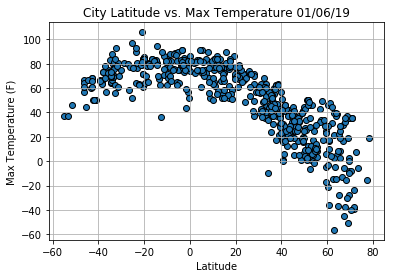

In [12]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors = 'black')

plt.grid()
plt.title("City Latitude vs. Max Temperature " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/Latitude_MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

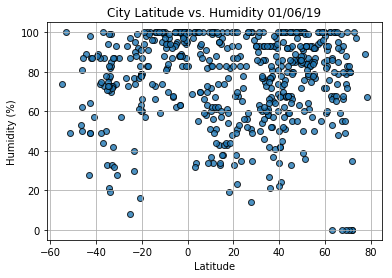

In [13]:
#scatter plot latitude Vs Humidity

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Humidity " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/Latitude_Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

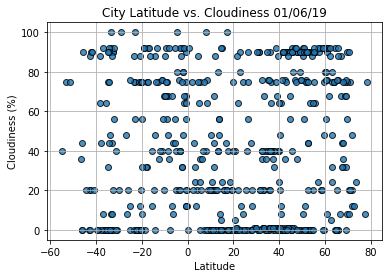

In [14]:
#scatter plot latitude Vs Cloudniess
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Cloudiness " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/Latitude_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

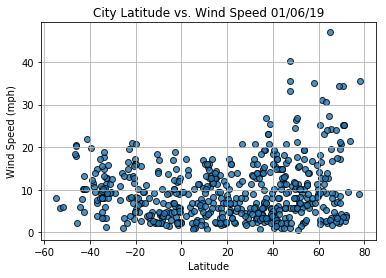

In [16]:
#scatter plot latitude Vs Wind Speed 
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Wind Speed " + cur_date)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/Latitude_Wind_Speed.png')
plt.show()